
<p style="text-align:left;"><font size='6'><b> Intro to Linear Regression </b></font></p>


<p style="text-align:left;"><font size='4'><b> Intro to Machine Learning & Regression </b></font></p>

---

<h2 align="center"> About this Notebook </h2>

[comment]: <> (Learning objectives describe what students should know/be able to do..)
[comment]: <> (by the end of the lecture that they may not have been able to do before)
<h3> Learning Objectives: </h3>

By the end of lecture, we will be able to:

- **Segment data** into features and labels, then split it using sklearn
- Train and evaluate a **linear regression model**
- Preprocess data by **scaling**
- Explain the difference between various scaling methods (StandardScaler, MinMaxScaler)
<br></br>


[comment]: <> (A list of the libraries used in the notebook + the import..)
[comment]: <> (for the libraries can be found before the section it's used in as well)
<h3> Libraries Used: </h3>

- Pandas
- Matplotlib
- sklearn
<br></br>


[comment]: <> (ToC shows an overview of the lecture + its subsections)
<h3> Table of Contents: </h3>

- [1. Boston Housing Data](#-1.-Boston-Housing-Data-)
    - [1.1. Exploring the Data](#1.1-Exercise)
    - [1.2. Splitting Data into Training and Test Sets](#Splitting-Data-into-Training-and-Test-Sets)
- [2. Linear Regression](#-2.-Linear-Regression-)
- [3. Scaling Data](#-3.-Scaling-Data-)
<br></br>


[comment]: <> (This section is a summary of the links shared in the notebook, listed in order of appearance)
[comment]: <> (If it is preview material, it will be specified in brackets, e.g. [PREVIEW] at the beginning)
<h3> Readings/References: </h3>

- If you're interested in reading about the toy datasets used in scikit-learn and its characteristics: https://scikit-learn.org/stable/datasets/toy_dataset.html
- Links shared throughout this notebook:
    - [train_test_split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - [Scaling Data](https://scikit-learn.org/stable/modules/preprocessing.html)
    - [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
<br></br>

# Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

---

# <font color='#347B98'> 1. Boston Housing Data </font>

The Boston house-price data has been used in many machine learning papers that address regression problems.
 	
- **CRIM** per capita crime rate by town
- **ZN** proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** proportion of non-retail business acres per town
- **CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX** nitric oxides concentration (parts per 10 million)
- **RM** average number of rooms per dwelling
- **AGE** proportion of owner-occupied units built prior to 1940
- **DIS** weighted distances to five Boston employment centres
- **RAD** index of accessibility to radial highways
- **TAX** full-value property-tax rate per \$10,000
- **PTRATIO** pupil-teacher ratio by town
- **B** "1000(Bk - 0.63)^2" where Bk is the proportion of blacks by town
- **LSTAT** percent lower status of the population
- **MEDV** Median value of owner-occupied homes in $1000’s



In [2]:
df=pd.read_csv('bostonhousing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
df.shape # Getting the dimensions of our dataset (rows, columns)

(506, 13)

## 1.1 EAD

- Explore the data
- Find a column that has a linear relationship with `MEDV`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


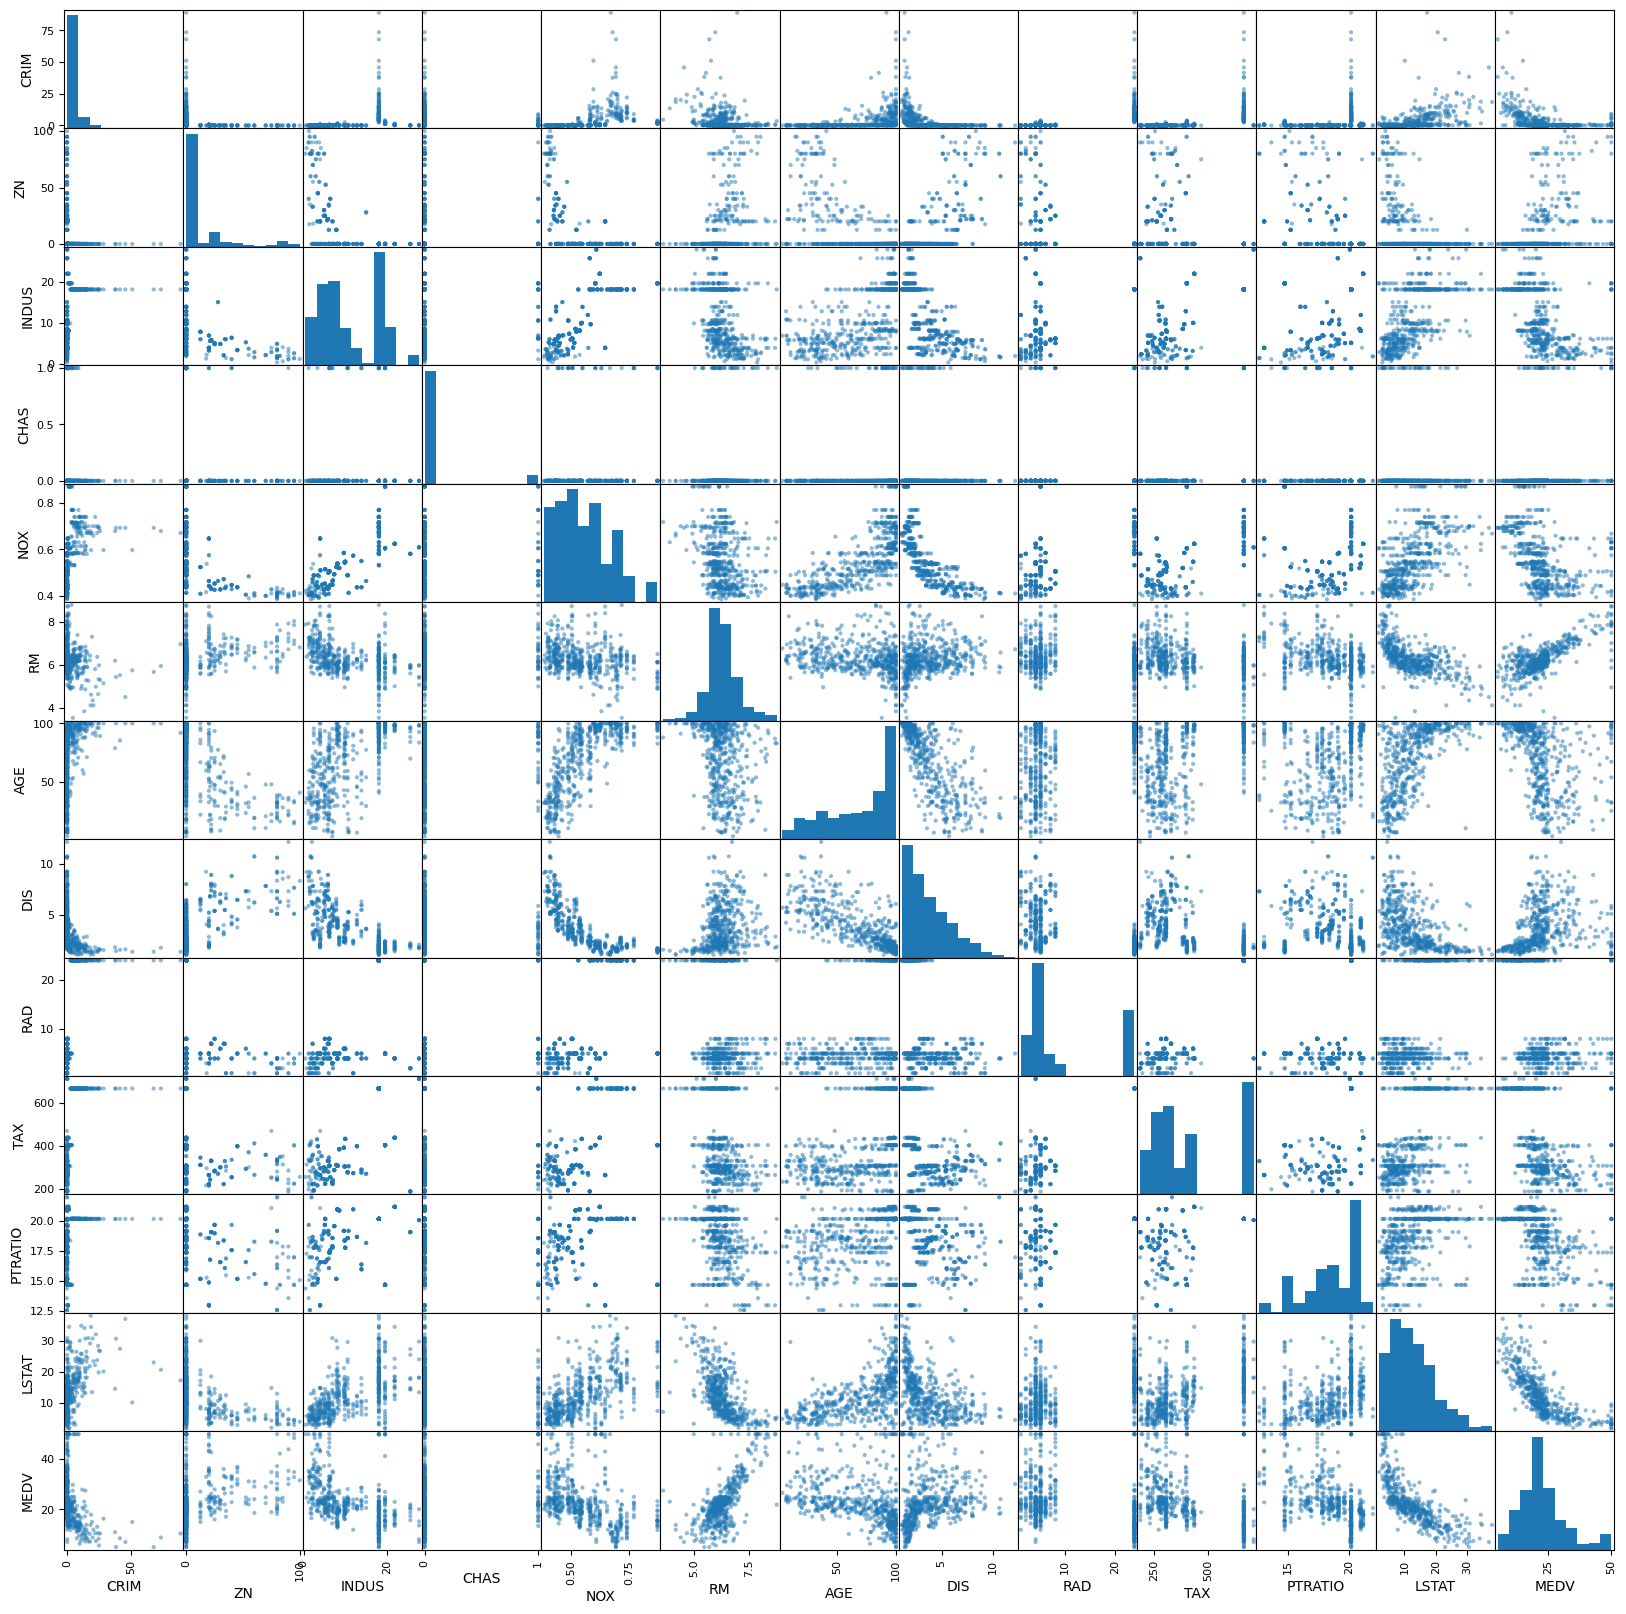

In [7]:
# Plotting scatter matrix using pandas
pd.plotting.scatter_matrix(df, figsize=(20, 20));

# RM and LSTAT have a linear relationship with MEDV

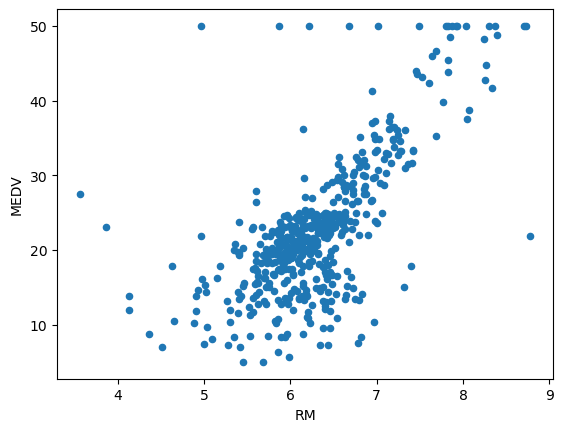

In [9]:
df.plot(kind='scatter', x='RM',y='MEDV');

/Users/weicheng/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


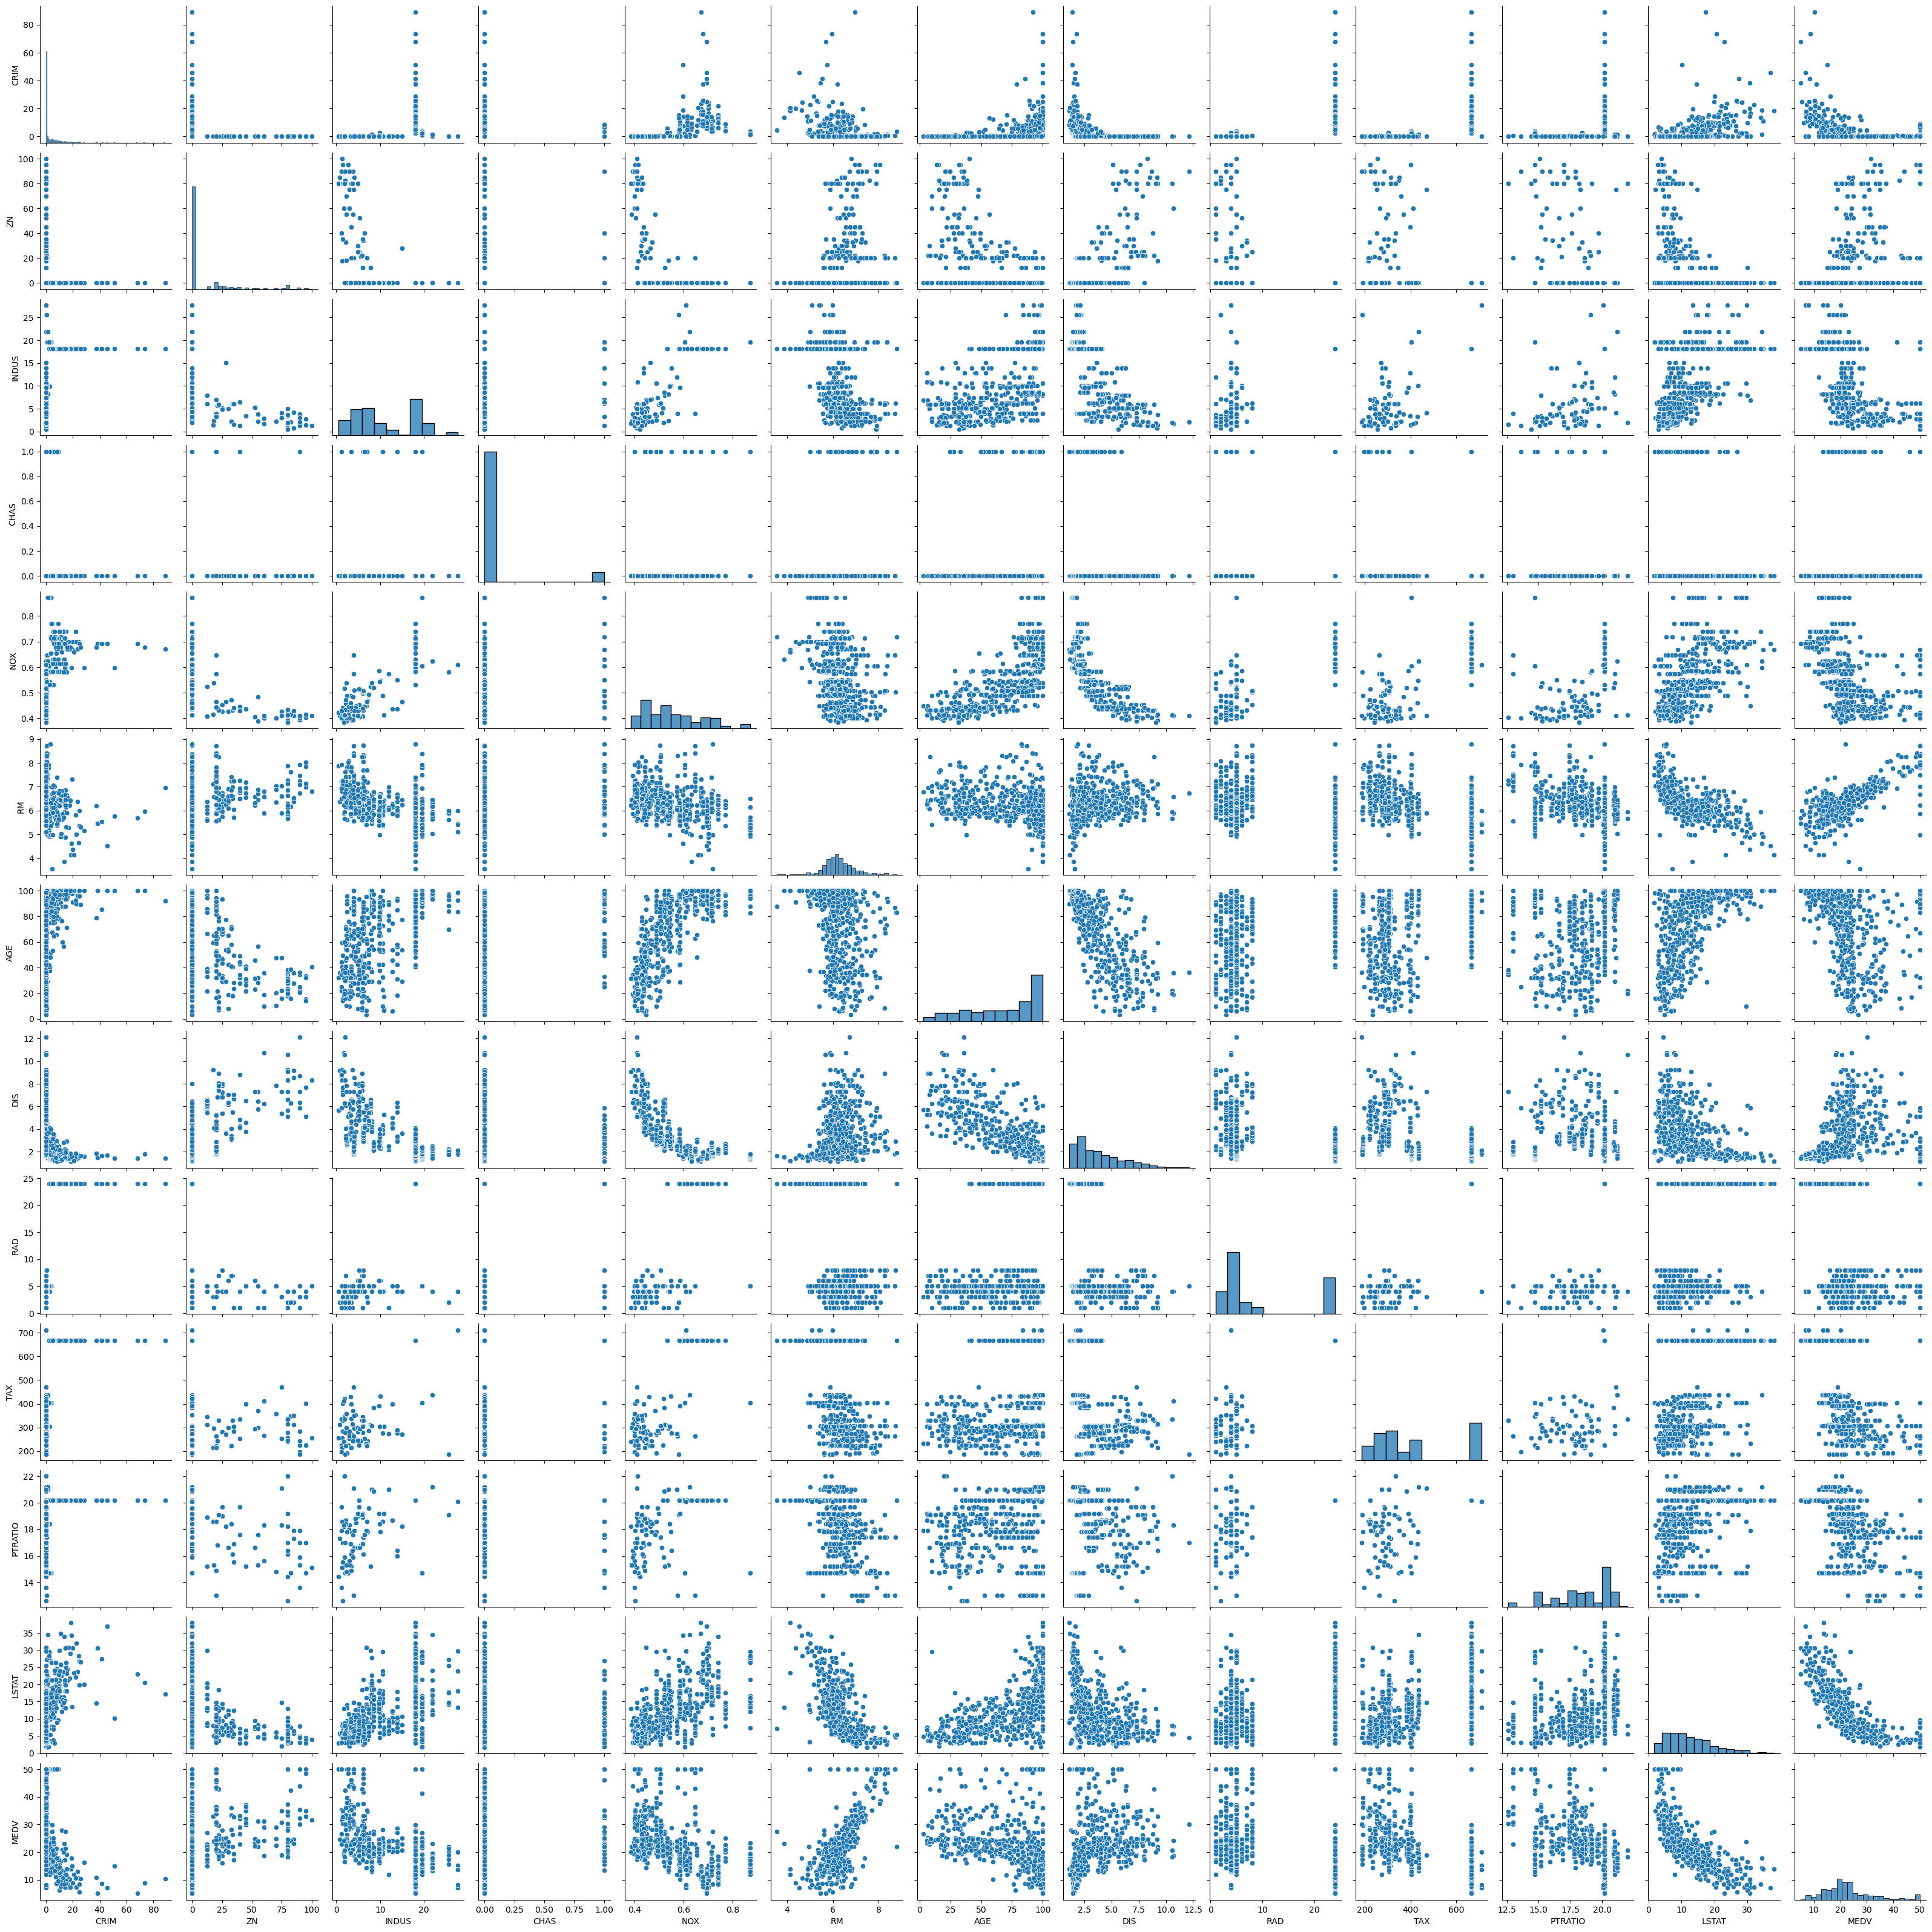

In [10]:
# Seaborn pairplot
import seaborn as sns

# Plotting pairplot using seaborn
sns.pairplot(df)

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [13]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


## 1.2 Splitting Data into Training and Test Sets

- Segment the data into `X` (features) and `y` (labels)
    - For `X`, use the feature that you found from the previous exercise
    - Make sure `X` is a **DataFrame** and `y` is a **Series**
- Segment the data into a training and test set with a **70:30** ratio (hint: use `train_test_split`)
- Get the dimensions (number of rows, number of columns) of each subset

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
from sklearn.model_selection import train_test_split

In [24]:
X=pd.DataFrame(df['RM'])
X
# X needs to be dataframe

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [28]:
y=df['MEDV']
# y needs to be series

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1314)

In [30]:
X_train.shape

(354, 1)

In [31]:
X_test.shape

(152, 1)

In [32]:
y_train.shape

(354,)

In [34]:
y_test.shape

(152,)

# <font color='#347B98'> 2. Linear Regression </font>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # initialize the model

### Training a model

In [36]:
model.fit(X_train,y_train) # calculate the maximum m and b (y=mx+b)

LinearRegression()

### Making predictions

In [38]:
y_pred = model.predict(X_test)

In [43]:
y_pred[:5]

array([20.90126773, 27.8762254 , 11.6908697 , 21.96622   , 20.0953579 ])

In [45]:
y_test[:5]

51     20.5
259    30.1
413    16.3
247    20.5
332    19.4
Name: MEDV, dtype: float64

### Evaluate Model

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
print('MSE:',mean_squared_error(y_test,y_pred))

# using MSE when compare to different models, lower the better

MSE: 53.37300371887809


In [53]:
print('r2:', r2_score(y_test,y_pred))
# close to 1, the better, (range is from 0 to 1)

r2: 0.37858461255404174


### Getting model coefficients

In [54]:
# y=mx+b
# m
model.coef_

array([9.59416462])

In [55]:
# y=mx+b
# b
model.intercept_

-37.76704890377462

In [ ]:
y_hat = 9.6(RM) + (-37.8)

### Plotting the regression line

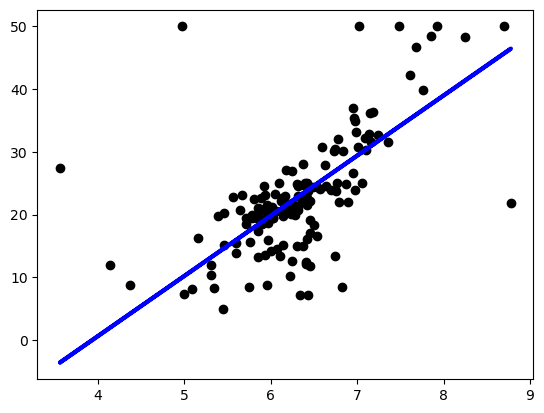

In [60]:
plt.scatter(X_test.values, y_test.values, color='black');
plt.plot(X_test,y_pred, color='blue', linewidth=3);

## Exercise

- Build a new Linear Regression model using **all** the data
- Get the prediction
- Calculate the MSE
- Create a bar plot of with `feature name` on the x-axis and `coefficent` on the y-axis

In [63]:
X = df.drop(columns='MEDV')
y=df['MEDV']

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1314)

In [64]:
model = LinearRegression()

In [66]:
model.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred=model.predict(X_test)

In [68]:
mean_squared_error(y_test,y_pred)

27.508912163513575

In [69]:
r2_score(y_test,y_pred)

0.6797170831841286

In [70]:
model.coef_

array([-1.28627409e-01,  3.34509461e-02, -2.11692695e-02,  3.12139323e+00,
       -1.78468751e+01,  4.54364636e+00,  8.67154632e-03, -1.29511655e+00,
        3.16651274e-01, -1.53074481e-02, -9.04673996e-01, -4.46370513e-01])

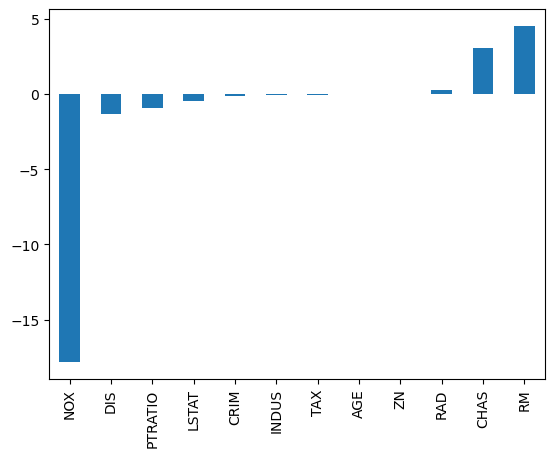

In [74]:
pd.Series(model.coef_, index=X.columns).sort_values().plot(kind='bar');

# the coefficient is by how much one unit will change the target 
# this cannot tell which feature is the most useful to the model (LSTAT)

In [75]:
X.describe()
# NOX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


In [ ]:
# is I want to know which feature is more useful to my model:
# need to change the scalling of all the features, to within the same range (from min to max)


# <font color='#347B98'> 3. Scaling Data </font>

- StandardScaler
    - mean = 0
    - std = 1
    
- MinMaxScaler
    - range = (0, 1)

https://scikit-learn.org/stable/modules/preprocessing.html